In [1]:
# Import Libraries. Libraries not imported here will be imported when they get used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The next line is just for Jupyter (inline IDE)
%matplotlib inline

In [2]:
# Set variables for matplotlib for asthetics and size of graphs
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [4]:
# Loading Data
df = pd.read_csv('Insolation-Inputs.csv')


# Print first five rows of data frame to visualize the data.
print(df.head())

        LAT       LON  YEAR  MO  DY      QV2M    KT   DTI   SII
0  28.67591  77.11321  1998   1   1  0.003275  0.56  6.98  3.26
1  28.67591  77.11321  1998   1   2  0.002891  0.59  6.34  3.45
2  28.67591  77.11321  1998   1   3  0.002866  0.61  6.75  3.59
3  28.67591  77.11321  1998   1   4  0.003280  0.58  6.90  3.42
4  28.67591  77.11321  1998   1   5  0.003660  0.60  7.05  3.54


In [5]:
# Show the list of all columns in the actual dataset
print(df.columns)

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'QV2M', 'KT', 'DTI', 'SII'], dtype='object')


In [6]:
print(df.dtypes)

LAT     float64
LON     float64
YEAR      int64
MO        int64
DY        int64
QV2M    float64
KT      float64
DTI     float64
SII     float64
dtype: object


In [7]:
#drop unneeded features
df = df.drop(['LAT', 'LON'], axis=1)

print(df.columns)

Index(['YEAR', 'MO', 'DY', 'QV2M', 'KT', 'DTI', 'SII'], dtype='object')


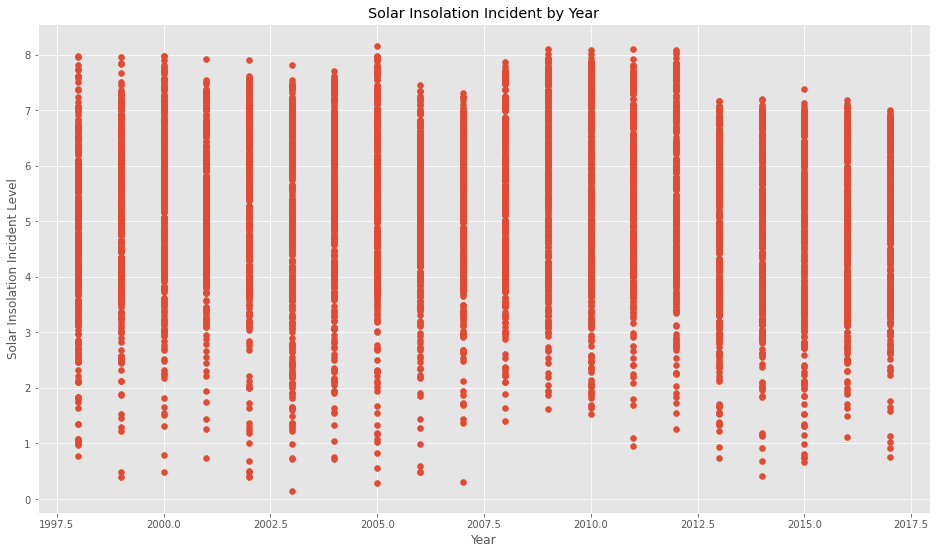

In [8]:
x = df['YEAR']
y = df['SII']
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Solar Insolation Incident Level')
plt.title('Solar Insolation Incident by Year')
plt.show()

In [9]:
df['Date'] = pd.to_datetime(dict(year=df.YEAR, month=df.MO, day=df.DY))
print(df.head())

   YEAR  MO  DY      QV2M    KT   DTI   SII       Date
0  1998   1   1  0.003275  0.56  6.98  3.26 1998-01-01
1  1998   1   2  0.002891  0.59  6.34  3.45 1998-01-02
2  1998   1   3  0.002866  0.61  6.75  3.59 1998-01-03
3  1998   1   4  0.003280  0.58  6.90  3.42 1998-01-04
4  1998   1   5  0.003660  0.60  7.05  3.54 1998-01-05


In [10]:
df = df.drop(['YEAR', 'MO', 'DY'], axis=1)

print(df.columns)

Index(['QV2M', 'KT', 'DTI', 'SII', 'Date'], dtype='object')


In [11]:
def time_series(start, end):
    time_series_df = df[['Date', 'SII']][(df['Date'] >= start) & (df['Date'] <= end)]
    x1 = time_series_df.Date
    y1 = time_series_df.SII
    plt.plot(x1,y1)
    plt.xlabel('Time')
    plt.ylabel('Solar Insolation Value')
    plt.title('Solar Insolation Incident Time Series')
    return plt.show();

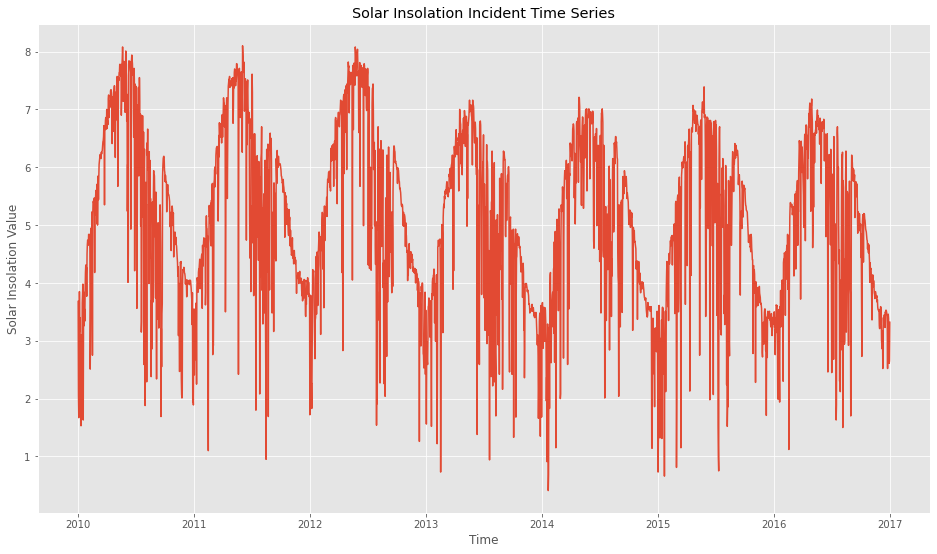

In [12]:
time_series('2010','2017')

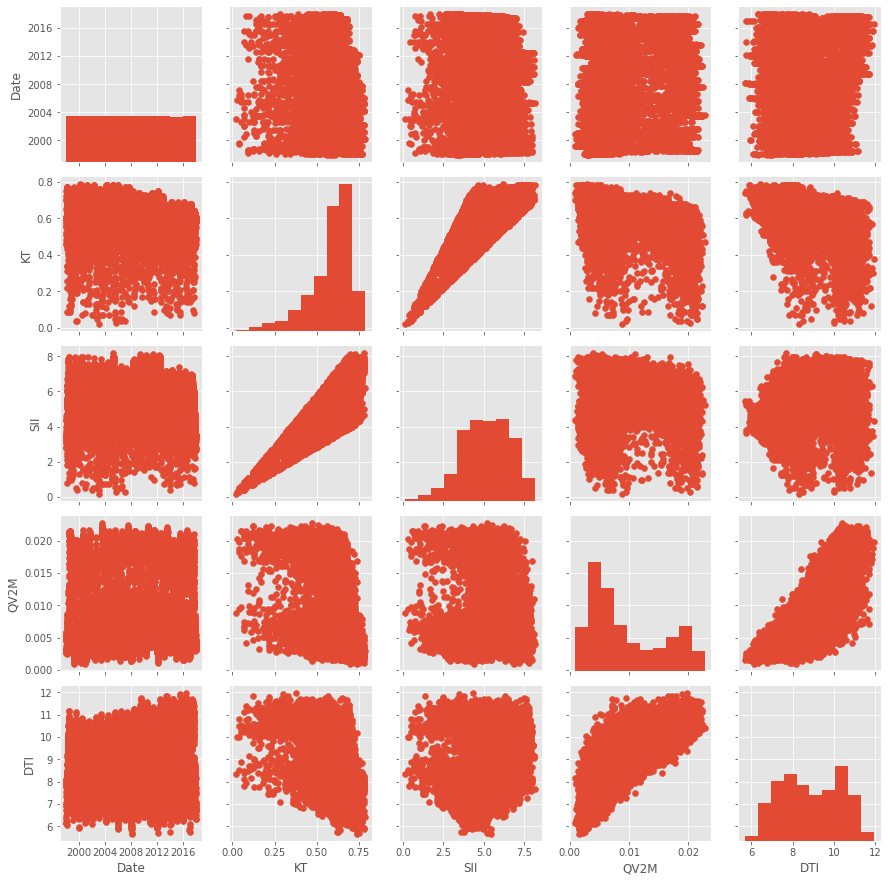

In [13]:
g = sns.PairGrid(df, vars=["Date", "KT", "SII", "QV2M", "DTI"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [15]:
# Separate independent variable data (X) from dependent variable data (Y)
y = df['SII']
X = df.drop(['SII','Date'], axis=1)

print(f'Inputs: {X}')
print(f'Outputs: {y}')
print(df)

Inputs:           QV2M    KT   DTI
0     0.003275  0.56  6.98
1     0.002891  0.59  6.34
2     0.002866  0.61  6.75
3     0.003280  0.58  6.90
4     0.003660  0.60  7.05
...        ...   ...   ...
7293  0.003568  0.60  6.71
7294  0.003605  0.59  6.86
7295  0.004107  0.59  7.09
7296  0.003375  0.58  6.94
7297  0.002991  0.48  7.43

[7298 rows x 3 columns]
Outputs: 0       3.26
1       3.45
2       3.59
3       3.42
4       3.54
        ... 
7293    3.42
7294    3.38
7295    3.37
7296    3.32
7297    2.80
Name: SII, Length: 7298, dtype: float64
          QV2M    KT   DTI   SII       Date
0     0.003275  0.56  6.98  3.26 1998-01-01
1     0.002891  0.59  6.34  3.45 1998-01-02
2     0.002866  0.61  6.75  3.59 1998-01-03
3     0.003280  0.58  6.90  3.42 1998-01-04
4     0.003660  0.60  7.05  3.54 1998-01-05
...        ...   ...   ...   ...        ...
7293  0.003568  0.60  6.71  3.42 2017-12-26
7294  0.003605  0.59  6.86  3.38 2017-12-27
7295  0.004107  0.59  7.09  3.37 2017-12-28
7296  0.003

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
# Check number of rows in training data
X_train.shape, y_train.shape

((5473, 3), (5473,))

In [18]:
# Check number of rows in testing data
X_test.shape, y_test.shape

((1825, 3), (1825,))

0.8551824209821941
Coefficients: 
 [-59.85153648  10.88873762   0.95947107]
Root mean squared error: 0.57
Mean absolute error: 0.46
R-squared: 0.86


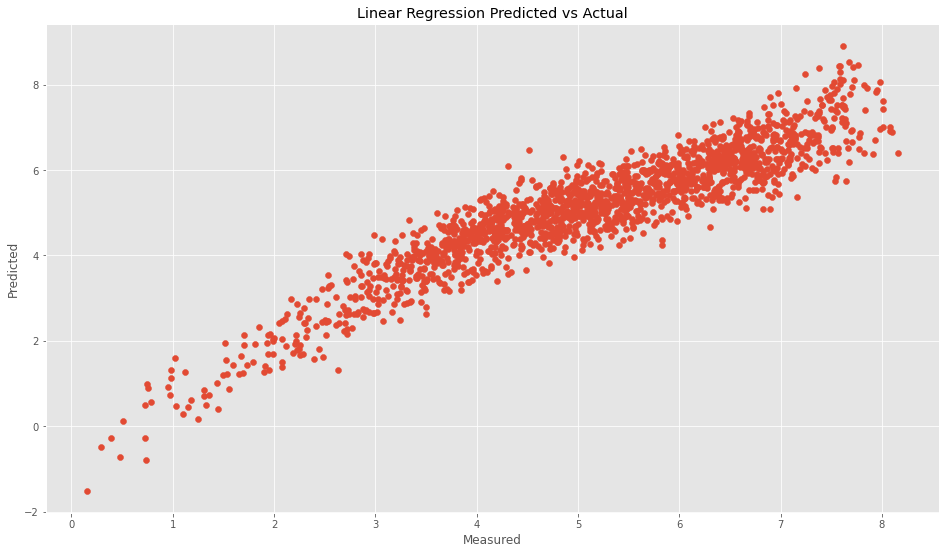

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lin_pred = regr.predict(X_test)

linear_regression_score = regr.score(X_test, y_test)
print(linear_regression_score)

from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8687483404252679
Root mean squared error: 0.54
Mean absolute error: 0.43
R-squared: 0.87


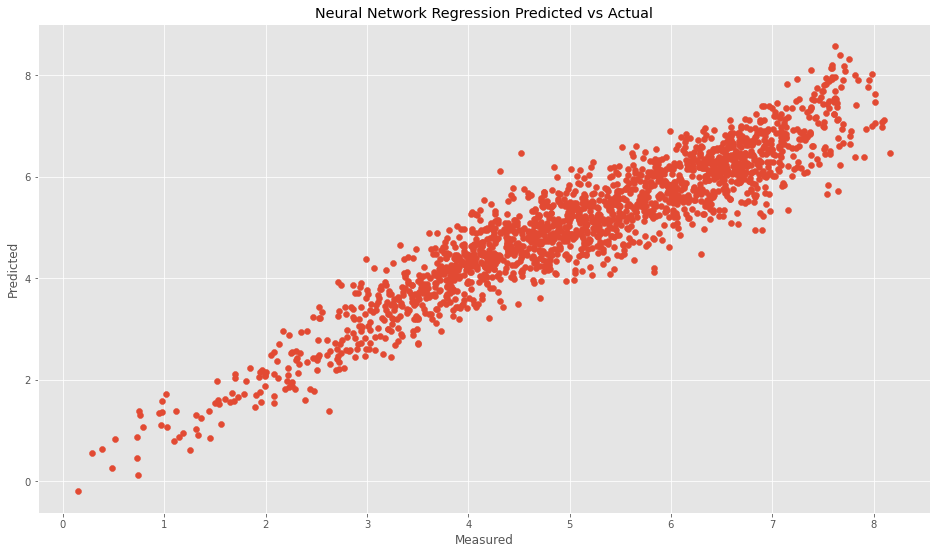

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

# Train the model using the training sets
mlp.fit(X_train, y_train)

# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
print(neural_network_regression_score)

# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

0.889531671573857
Root mean squared error: 0.50
Mean absolute error: 0.35
R-squared: 0.89
Index(['QV2M', 'KT', 'DTI'], dtype='object')


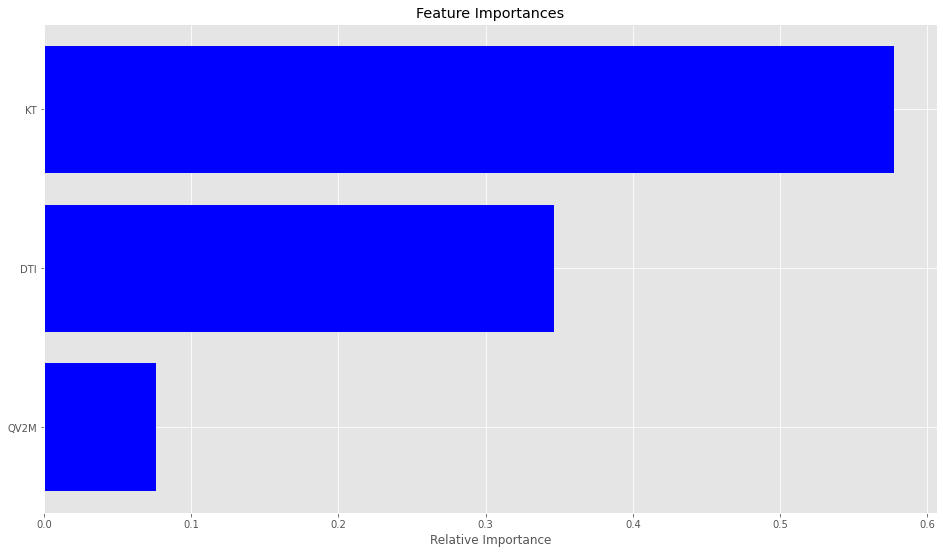

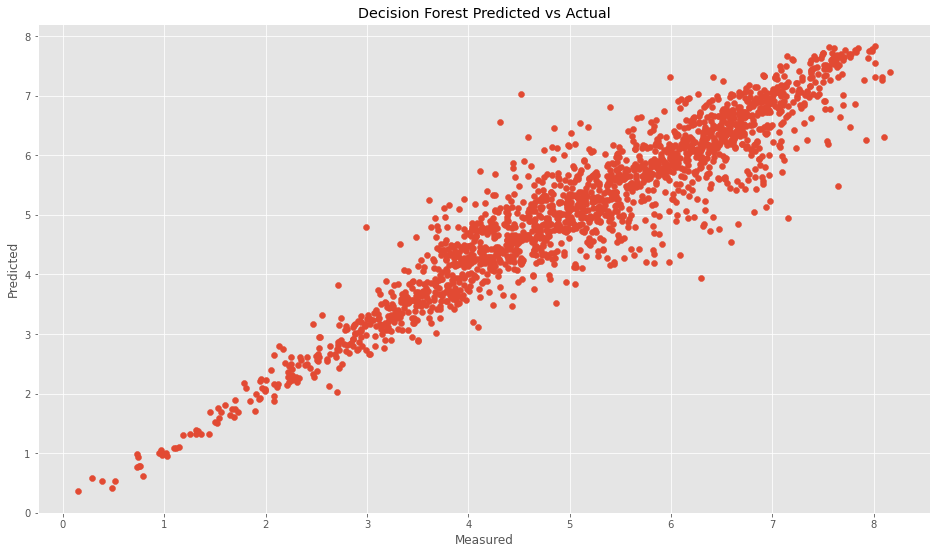

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=0)

# Train the model using the training sets
regr_rf.fit(X_train, y_train)

# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
print(decision_forest_score)

# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

print(X.columns)

features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

0.8813002920069632
Root mean squared error: 0.52


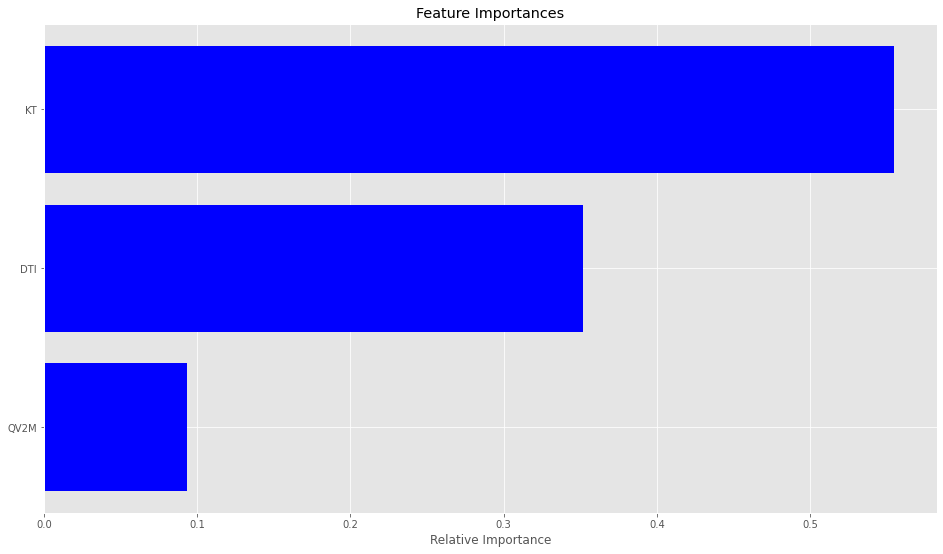

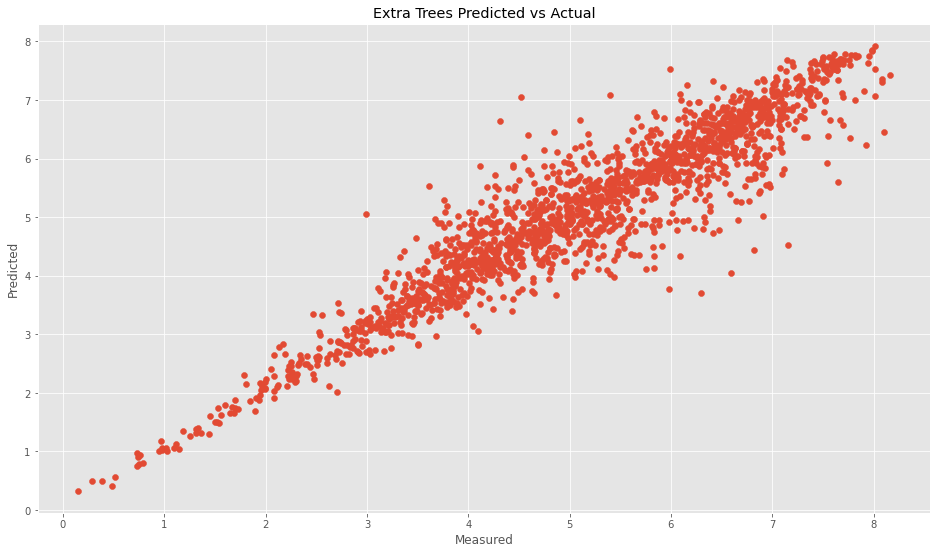

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=0)

extra_tree.fit(X_train, y_train)

extratree_score = extra_tree.score(X_test, y_test)
print(extratree_score)

extratree_pred = extra_tree.predict(X_test)

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

###The major problem towards utilizing non-conventional energy is the fluctuation of energy reception from these sources which makes the integration of these sources difficult into the grid. Maining an equilibrium between energy supply and demand can be erratic and this situation calls for forecasting the amount of electricity generated from Non Conventional Sources.